In [1]:
##This Python 3 environment comes with many helpful analytics libraries installed
##It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
##For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Input data files are available in the read-only "../input/" directory
#For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
#You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv


In [2]:
df = pd.read_csv('/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.shape

(180, 9)

In [4]:
rows = df.shape[0]
columns = df.shape[1]
#rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [11]:
df.Product.value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

In [12]:
# to find the name of the value
#df.Product.value_counts().index[0]

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Product', ylabel='count'>

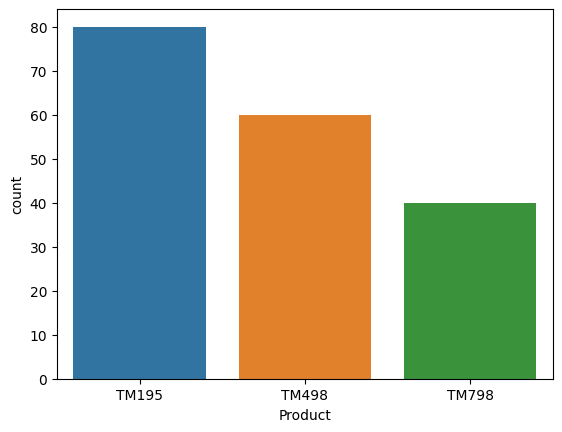

In [14]:
sns.countplot(data=df,x='Product')

***Maximum People uses TM195***

In [15]:
# sub setting for the TM195 products
df_195 = df[df['Product']=='TM195']
df_195.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [16]:
df_195.Gender.value_counts()

Gender
Male      40
Female    40
Name: count, dtype: int64

***Gender wise the model (TM195) using ratio is same***

In [17]:
df_195['Age'].value_counts()

Age
23    8
25    7
26    7
28    6
24    5
38    4
21    4
22    4
29    3
19    3
27    3
35    3
34    2
33    2
32    2
31    2
30    2
20    2
41    1
47    1
46    1
44    1
43    1
18    1
40    1
39    1
37    1
36    1
50    1
Name: count, dtype: int64

*Age can be different for every person and so the number of the unique value will increase.*

*Age values can be segmented within a group, rather than age, age group will be limited as it will work as range*

In [18]:
#df['Age Group'] = 

for lab, row in df.iterrows():
    if row['Age'] >= 18 and row['Age'] <30:
        df.loc[lab,'Age Group'] = '18-29'
    elif row['Age'] >= 30 and row['Age'] <40:
        df.loc[lab, 'Age Group'] = '30-39'
    elif row['Age'] >= 40 and row['Age'] <50:
        df.loc[lab, 'Age Group'] = '40-49'
    elif row['Age'] >= 50 and row['Age'] <=60:
        df.loc[lab, 'Age Group'] = '50-60'
    else:
        df.loc[lab,'Age Group'] = 'Under or Over Aged'

In [19]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group
0,TM195,18,Male,14,Single,3,4,29562,112,18-29
1,TM195,19,Male,15,Single,2,3,31836,75,18-29
2,TM195,19,Female,14,Partnered,4,3,30699,66,18-29
3,TM195,19,Male,12,Single,3,3,32973,85,18-29
4,TM195,20,Male,13,Partnered,4,2,35247,47,18-29


In [20]:
# sub setting for the TM195 products after adding Age Group
df_195 = df[df['Product']=='TM195']
df_195.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group
0,TM195,18,Male,14,Single,3,4,29562,112,18-29
1,TM195,19,Male,15,Single,2,3,31836,75,18-29
2,TM195,19,Female,14,Partnered,4,3,30699,66,18-29
3,TM195,19,Male,12,Single,3,3,32973,85,18-29
4,TM195,20,Male,13,Partnered,4,2,35247,47,18-29


In [21]:
df['Age Group'].value_counts()

Age Group
18-29    113
30-39     50
40-49     16
50-60      1
Name: count, dtype: int64

In [22]:
df_195['Age Group'].value_counts()

Age Group
18-29    53
30-39    20
40-49     6
50-60     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Age Wise Count of Users')

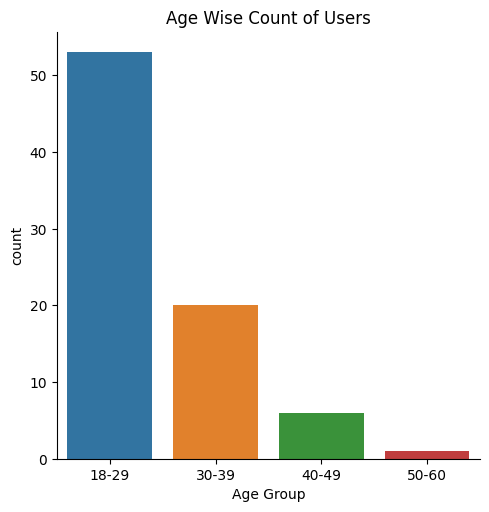

In [23]:
sns.catplot(data=df_195
            ,x='Age Group'
            ,kind='count')

plt.title('Age Wise Count of Users')

<Axes: xlabel='Age', ylabel='Income'>

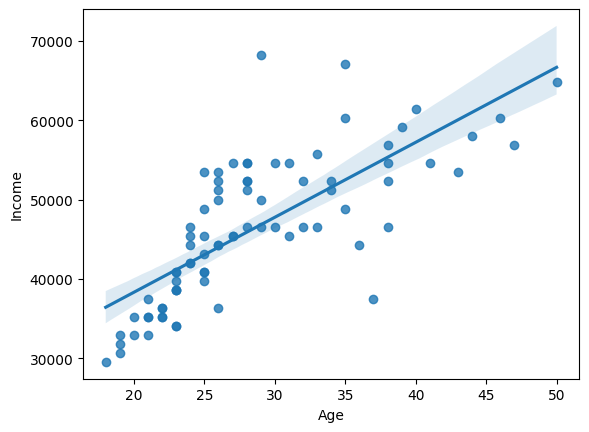

In [24]:
sns.regplot(x='Age',
           y='Income',
           data=df_195)
          # hue='Age Group')

*Age and Income is in a linear relation*

In [25]:
df_195['Age'].corr(df_195['Income'])

0.7518313702099026

Age and Income having a correlation value of 0.75 which means they are in positive correlation and they are highly correlated  

In [26]:
df.Education.value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64